## Introduction 

    Week 2 is about KKN meethod. KNN is a supervised machine learning algorithm that can be used to solve classification and regression problems. This week assignment has two part. part 1 is exercise on Heart disease data from week 1. the second part is the project where we use KNN on Bank data. 
    
## Dataset

    For the exercise, we are going to use Heart disease dataset which is set of records of people with there diagnosis of heart disease. The data contains 15 variables where 'num' is the target and the other 14 are our features. those features are various from chest pain to number of years of smoking. As for the project, the dataset is Bank dataset which contains personal information such as marital status and education level. This dataset contains 17 columns where 'Y' is the target. Because this data has many categorical variable, we need to convert them to numeric in order to fit them in KNN model. 
    
    
## Method and Result 

### exercise 1


    Loading required libraries 


In [2]:
# pandas
import pandas as pd

# sklearn
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

# plotting
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set() 


    Loading cleaned Heart disease dataset.

In [3]:
# loading heart disease data
heartd = pd.read_csv('heart.disease.data.clean.csv')



    Data is clean and numeric. No cleaning needed except for dropping unnecessary columns for KNN model which will be determined after seeing correlation.

In [4]:
heartd.head(10)

,age,sex,cp,trestbps,chol,cigs,years,fbs,famhist,restecg,thalach,exang,thal,num
0,63,1,1,145,233,50.0,20.0,1,1,2,150,0,6,0
1,67,1,4,160,286,40.0,40.0,0,1,2,108,1,3,2
2,67,1,4,120,229,20.0,35.0,0,1,2,129,1,7,1
3,37,1,3,130,250,0.0,0.0,0,1,0,187,0,3,0
4,41,0,2,130,204,0.0,0.0,0,1,2,172,0,3,0
5,56,1,2,120,236,20.0,20.0,0,1,0,178,0,3,0
6,62,0,4,140,268,0.0,0.0,0,1,2,160,0,3,3
7,57,0,4,120,354,0.0,0.0,0,1,0,163,1,3,0
8,63,1,4,130,254,0.0,0.0,0,0,2,147,0,7,2
9,53,1,4,140,203,20.0,25.0,1,1,2,155,1,7,1


In [5]:
heartd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       282 non-null    int64  
 1   sex       282 non-null    int64  
 2   cp        282 non-null    int64  
 3   trestbps  282 non-null    int64  
 4   chol      282 non-null    int64  
 5   cigs      282 non-null    float64
 6   years     282 non-null    float64
 7   fbs       282 non-null    int64  
 8   famhist   282 non-null    int64  
 9   restecg   282 non-null    int64  
 10  thalach   282 non-null    int64  
 11  exang     282 non-null    int64  
 12  thal      282 non-null    int64  
 13  num       282 non-null    int64  
dtypes: float64(2), int64(12)
memory usage: 31.0 KB


In [6]:
heartd.describe()

,age,sex,cp,trestbps,chol,cigs,years,fbs,famhist,restecg,thalach,exang,thal,num
count,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000
mean,54.411348,0.677305,3.163121,131.195035,247.705674,16.836011,15.347364,0.148936,0.620567,1.014184,149.826241,0.326241,4.677305,0.907801
std,9.053083,0.468338,0.955405,16.739821,46.178771,18.876755,15.276814,0.356658,0.486108,0.998118,22.737594,0.469670,1.936386,1.224894
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,0.000000,0.000000,0.000000,88.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,0.000000,0.000000,0.000000,133.250000,0.000000,3.000000,0.000000
50%,55.000000,1.000000,3.000000,130.000000,244.000000,11.976385,15.000000,0.000000,1.000000,2.000000,153.500000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,277.000000,30.000000,30.000000,0.000000,1.000000,2.000000,165.750000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,170.000000,360.000000,75.000000,54.000000,1.000000,1.000000,2.000000,202.000000,1.000000,7.000000,4.000000


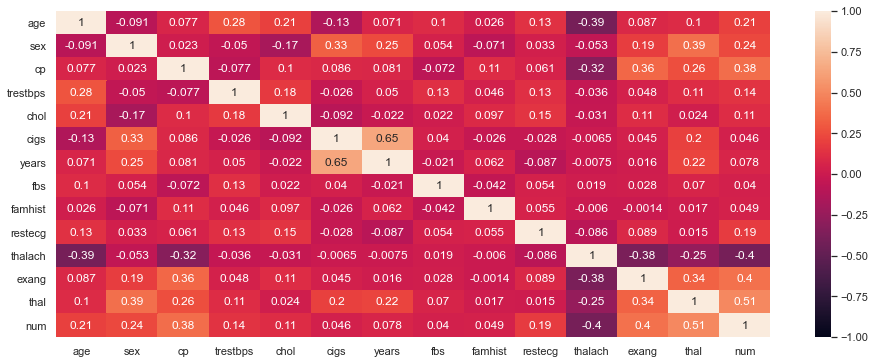

In [7]:
plt.figure(figsize=(16, 6))
_ = sns.heatmap(heartd.corr(), vmin=-1, vmax=1, annot=True)

    Since maximum correlation with num is 0.51, i am going to drop very low correlated variables. In this case, cigarrets consumption and number of years of smoking are below 0.07. Also fbs is 0.04 and family history is 0.049. those variables have very low correlation with the target compared to other independent variables which most of them have low correlation with num. However, I cannot drop most of them and only have 1 or 2 variables. 

In [8]:
# trimming our data set
# cigs, years, fbs, and famhist
heartd.drop(['cigs','years','fbs','famhist' ],axis=1, inplace=True)

In [9]:
heartd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   age       282 non-null    int64
 1   sex       282 non-null    int64
 2   cp        282 non-null    int64
 3   trestbps  282 non-null    int64
 4   chol      282 non-null    int64
 5   restecg   282 non-null    int64
 6   thalach   282 non-null    int64
 7   exang     282 non-null    int64
 8   thal      282 non-null    int64
 9   num       282 non-null    int64
dtypes: int64(10)
memory usage: 22.2 KB


    here we define the features and the target. The target is 'num' which is number of diagnosis of heart disease.

In [17]:
# Defining our features and targets
cols = heartd.columns
target_col = 'num'
feat_cols = [c for c in cols if c != target_col]

# there is nothing magical about the X and y notation here. 
# however, it seems to be a fairly standard notation, so we will use is here
X = heartd[feat_cols].values
y = heartd[target_col].values

    Here we split the data into test and train with split ratio of 80% training and 20% testing

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    Here we fit the train data into a KNN regressor model with 1 cluster, which I assume that it is not going to preform good

In [19]:
# Make prediction based on 1-nearest neighbor.
#What is the error rate of this approach?
#Report your results in a confusion matrix.


# define and fit our model
model = KNeighborsRegressor(n_neighbors=1, n_jobs=-1)
model.fit(X_train, y_train)

KNeighborsRegressor(n_jobs=-1, n_neighbors=1)

In [20]:
# gather the predictations that our model made for our test set
preds = model.predict(X_test)

# display the actuals and predictions for the test set
print('Actuals for test data set')
print(y_test)
print('Predictions for test data set')
print(preds)

Actuals for test data set
[0 0 0 1 3 0 0 1 1 4 3 1 0 3 0 4 0 4 0 0 0 1 2 0 0 0 0 3 0 2 0 2 0 3 0 0 2
 3 0 1 4 4 1 0 0 0 0 3 0 0 3 1 0 1 2 0 3]
Predictions for test data set
[2. 1. 0. 0. 1. 0. 3. 0. 3. 4. 2. 0. 2. 0. 0. 2. 1. 1. 0. 1. 3. 0. 1. 0.
 0. 0. 0. 2. 0. 0. 1. 3. 0. 2. 0. 0. 1. 4. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 3. 0. 1.]


In [21]:
#compare the two sets
differs = y_test - preds
print('Differences between the two sets')
print(differs)

Differences between the two sets
[-2. -1.  0.  1.  2.  0. -3.  1. -2.  0.  1.  1. -2.  3.  0.  2. -1.  3.
  0. -1. -3.  1.  1.  0.  0.  0.  0.  1.  0.  2. -1. -1.  0.  1.  0.  0.
  1. -1.  0.  1.  4.  4.  1. -1.  0.  0.  0.  3. -1.  0.  3.  1.  0.  1.
 -1.  0.  2.]


    The accuracy of the model is -19% which is bad because of the K number 

In [22]:
# R^2 (coefficient of determination) regression score function.
# Best possible score is 1.0 and it can be negative 
# (because the model can be arbitrarily worse). 
# A constant model that always predicts the expected value of y, 
# disregarding the input features, would get a R^2 score of 0.0.
from sklearn.metrics import r2_score

print(r2_score(y_test,preds))

-0.1974050046339202


In [23]:
# Explained variance regression score function
# Best possible score is 1.0, lower values are worse.

from sklearn.metrics import explained_variance_score

print(explained_variance_score(y_test,preds))

-0.13561940067964162


In [24]:
# Determining the optimal number of clusters
scores = []
print(f'Features: {feat_cols} \nTarget: {target_col}')

# remember the ending number for range is not inclusive
for k in range(2, 20):
    # output to let us know where we are
    print(f'Evaluating {k} clusters')
    
    # n_jobs=-1 will use all processors on your system
    model = KNeighborsRegressor(n_neighbors=k, n_jobs=-1)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))

Features: ['age', 'sex', 'cp', 'trestbps', 'chol', 'restecg', 'thalach', 'exang', 'thal'] 
Target: num
Evaluating 2 clusters
Evaluating 3 clusters
Evaluating 4 clusters
Evaluating 5 clusters
Evaluating 6 clusters
Evaluating 7 clusters
Evaluating 8 clusters
Evaluating 9 clusters
Evaluating 10 clusters
Evaluating 11 clusters
Evaluating 12 clusters
Evaluating 13 clusters
Evaluating 14 clusters
Evaluating 15 clusters
Evaluating 16 clusters
Evaluating 17 clusters
Evaluating 18 clusters
Evaluating 19 clusters


In [25]:
scores

[-0.1027571825764595,
 0.02270620945319768,
 0.0953429101019464,
 0.05264133456904563,
 0.11735403151065815,
 0.09745418093094527,
 0.05462233549582962,
 0.06759802743738497,
 0.07192307692307709,
 0.03638584854357052,
 0.010722376686232216,
 0.04849438719831545,
 0.09359100452043656,
 0.08015034496962226,
 0.08182670586190932,
 0.06883055244667802,
 0.07219047128685685,
 0.08526413345690453]

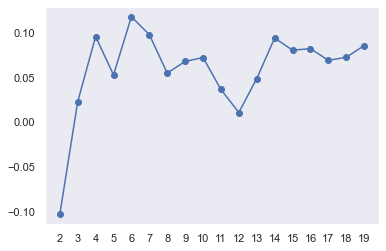

In [26]:
# display the resutls
plt.plot(range(2, 20), scores)
plt.scatter(range(2, 20), scores)
plt.grid()
_ =plt.xticks(range(2, 20))

    The optimal number of K is 6 based on the figure above. 

In [27]:
# define and fit our model
model = KNeighborsRegressor(n_neighbors=6, n_jobs=-1)
model.fit(X_train, y_train)

# gather the predictations that our model made for our test set
preds = model.predict(X_test)

# display the actuals and predictions for the test set
print('Actuals for test data set')
print(y_test)
print('Predictions for test data set')
print(preds)

Actuals for test data set
[0 0 0 1 3 0 0 1 1 4 3 1 0 3 0 4 0 4 0 0 0 1 2 0 0 0 0 3 0 2 0 2 0 3 0 0 2
 3 0 1 4 4 1 0 0 0 0 3 0 0 3 1 0 1 2 0 3]
Predictions for test data set
[1.16666667 0.33333333 0.         0.33333333 1.         1.16666667
 1.         0.5        1.83333333 2.         1.83333333 0.
 1.16666667 0.33333333 1.         1.         1.16666667 2.33333333
 0.66666667 2.         1.83333333 1.16666667 1.33333333 0.5
 0.83333333 0.16666667 0.         1.         1.         1.16666667
 0.16666667 2.16666667 0.66666667 1.5        0.         0.33333333
 0.33333333 1.83333333 0.83333333 0.83333333 1.33333333 0.
 0.33333333 0.66666667 0.         0.16666667 0.33333333 1.5
 0.66666667 0.66666667 0.5        1.16666667 0.5        0.
 0.83333333 0.66666667 1.33333333]


In [28]:
differs = y_test - preds

print(f'Differences between the two sets:\n{differs}')

print(f'r2_score: {r2_score(y_test,preds)}')

Differences between the two sets:
[-1.16666667 -0.33333333  0.          0.66666667  2.         -1.16666667
 -1.          0.5        -0.83333333  2.          1.16666667  1.
 -1.16666667  2.66666667 -1.          3.         -1.16666667  1.66666667
 -0.66666667 -2.         -1.83333333 -0.16666667  0.66666667 -0.5
 -0.83333333 -0.16666667  0.          2.         -1.          0.83333333
 -0.16666667 -0.16666667 -0.66666667  1.5         0.         -0.33333333
  1.66666667  1.16666667 -0.83333333  0.16666667  2.66666667  4.
  0.66666667 -0.66666667  0.         -0.16666667 -0.33333333  1.5
 -0.66666667 -0.66666667  2.5        -0.16666667 -0.5         1.
  1.16666667 -0.66666667  1.66666667]
r2_score: 0.11735403151065815


    With 6 clusters, the r2 = 0.11 which is better than 1 cluster that scored -0.19. However. accuracy of 11% is not good at all. I suspect that is because most of the features have very low correlation with the target. 

In [29]:
# visu alize model
pc = PCA()
tr_pca = pc.fit_transform(X_train)
te_pca = pc.transform(X_test)

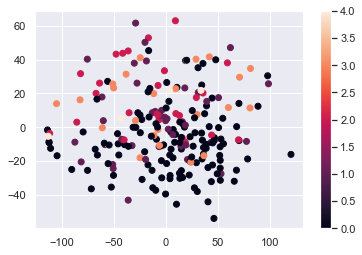

In [30]:
# indexing of a matrix in Python (numpy) is [rows, cols]
_ = plt.scatter(tr_pca[:, 0], tr_pca[:, 1], c=y_train)
_ = plt.colorbar()

    Scatter plot above shows the variation in the features for the train data.  

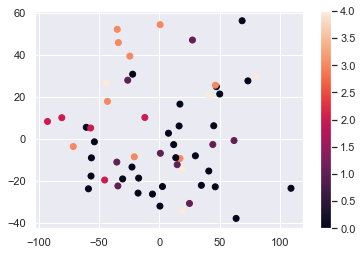

In [31]:
_ = plt.scatter(te_pca[:, 0], te_pca[:, 1], c=y_test)
_ = plt.colorbar()

    Scatter plot above shows the variation in the features for the test data.  

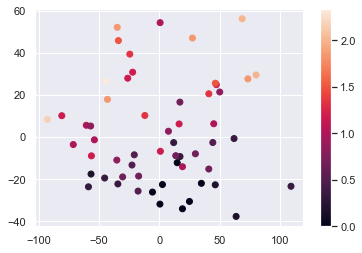

In [32]:
_ = plt.scatter(te_pca[:, 0], te_pca[:, 1], c=preds)
_ = plt.colorbar()

    Scatter plot above shows the variation in the features based on prediction of the model.  

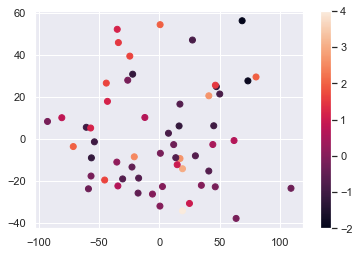

In [33]:
_ = plt.scatter(te_pca[:, 0], te_pca[:, 1], c=differs)
_ = plt.colorbar()

    Scatter plot above shows the variation based on the differences between test data and the predictions. It looks like the variation is significant. It is understandable the look like this because the preformance of the model is bad. 

    We are going to normalize data in hope to improve the model.

In [34]:
# normalize data to improve model maybe
heartd.describe()

,age,sex,cp,trestbps,chol,restecg,thalach,exang,thal,num
count,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000
mean,54.411348,0.677305,3.163121,131.195035,247.705674,1.014184,149.826241,0.326241,4.677305,0.907801
std,9.053083,0.468338,0.955405,16.739821,46.178771,0.998118,22.737594,0.469670,1.936386,1.224894
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,88.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,133.250000,0.000000,3.000000,0.000000
50%,55.000000,1.000000,3.000000,130.000000,244.000000,2.000000,153.500000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,277.000000,2.000000,165.750000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,170.000000,360.000000,2.000000,202.000000,1.000000,7.000000,4.000000


In [35]:
heartd.head(10)

,age,sex,cp,trestbps,chol,restecg,thalach,exang,thal,num
0,63,1,1,145,233,2,150,0,6,0
1,67,1,4,160,286,2,108,1,3,2
2,67,1,4,120,229,2,129,1,7,1
3,37,1,3,130,250,0,187,0,3,0
4,41,0,2,130,204,2,172,0,3,0
5,56,1,2,120,236,0,178,0,3,0
6,62,0,4,140,268,2,160,0,3,3
7,57,0,4,120,354,0,163,1,3,0
8,63,1,4,130,254,2,147,0,7,2
9,53,1,4,140,203,2,155,1,7,1


In [36]:
# we only want to normalize our feature columns in the dataset and I don't want to resplit the dataset.
# So, I will normalize the X_train and X_test only
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()

X_tr_norm = min_max_scaler.fit_transform(X_train)
X_te_norm = min_max_scaler.fit_transform(X_test)

In [37]:
new_heartd_tr = pd.DataFrame(X_tr_norm,columns=feat_cols)
new_heartd_tr['num'] = y_train
new_heartd_tr.head(10)

,age,sex,cp,trestbps,chol,restecg,thalach,exang,thal,num
0,0.458333,1.0,0.666667,0.407895,0.508547,1.0,0.684211,0.0,0.00,0
1,0.687500,0.0,1.000000,0.578947,0.717949,0.0,0.157895,0.0,0.00,2
2,0.416667,1.0,0.333333,0.473684,0.598291,0.0,0.728070,0.0,0.00,0
3,0.812500,1.0,0.666667,0.315789,0.645299,0.0,0.552632,0.0,1.00,0
4,0.625000,1.0,0.333333,0.605263,0.405983,0.0,0.666667,1.0,0.00,0
5,0.583333,1.0,0.333333,0.394737,0.576923,0.0,0.464912,0.0,1.00,1
6,0.562500,1.0,0.333333,0.342105,0.470085,0.0,0.789474,0.0,0.00,0
7,0.479167,1.0,0.333333,0.342105,0.850427,0.0,0.736842,0.0,0.00,0
8,0.583333,1.0,0.666667,0.736842,0.179487,0.0,0.754386,0.0,0.00,0
9,0.583333,1.0,1.000000,0.605263,0.282051,0.0,0.526316,0.0,0.75,0


In [38]:
new_heartd_te = pd.DataFrame(X_te_norm,columns=feat_cols)
new_heartd_te['num'] = y_test
new_heartd_te.head(10)

,age,sex,cp,trestbps,chol,restecg,thalach,exang,thal,num
0,0.675676,1.0,0.666667,0.384615,0.450,0.0,0.536842,0.0,1.0,0
1,0.189189,0.0,0.666667,0.046154,0.000,0.0,0.842105,0.0,0.0,0
2,0.432432,1.0,0.666667,0.384615,0.525,1.0,0.821053,0.0,0.0,0
3,0.756757,1.0,0.000000,0.507692,0.705,1.0,0.831579,0.0,0.0,1
4,0.567568,0.0,0.333333,0.476923,0.890,1.0,0.600000,0.0,0.0,3
5,1.000000,0.0,0.333333,0.230769,0.640,1.0,0.273684,1.0,0.0,0
6,0.378378,0.0,0.666667,0.538462,0.835,1.0,0.494737,0.0,0.0,0
7,0.432432,1.0,1.000000,0.538462,0.310,1.0,0.631579,1.0,1.0,1
8,0.567568,1.0,1.000000,0.630769,0.385,0.0,0.105263,0.0,1.0,1
9,0.648649,1.0,1.000000,0.507692,0.125,1.0,0.315789,1.0,0.0,4


In [39]:
scores_norm = []
print(f'Features: {feat_cols} \nTarget: {target_col}')

# remember the ending number for range is not inclusive
for k in range(1, 20):
    # output to let us know where we are
    print(f'Evaluating {k} clusters')
    
    # n_jobs=-1 will use all processors on your system
    model_norm = KNeighborsRegressor(n_neighbors=k, n_jobs=-1)
    model_norm.fit(X_tr_norm, y_train)
    scores_norm.append(model_norm.score(X_te_norm, y_test))

Features: ['age', 'sex', 'cp', 'trestbps', 'chol', 'restecg', 'thalach', 'exang', 'thal'] 
Target: num
Evaluating 1 clusters
Evaluating 2 clusters
Evaluating 3 clusters
Evaluating 4 clusters
Evaluating 5 clusters
Evaluating 6 clusters
Evaluating 7 clusters
Evaluating 8 clusters
Evaluating 9 clusters
Evaluating 10 clusters
Evaluating 11 clusters
Evaluating 12 clusters
Evaluating 13 clusters
Evaluating 14 clusters
Evaluating 15 clusters
Evaluating 16 clusters
Evaluating 17 clusters
Evaluating 18 clusters
Evaluating 19 clusters


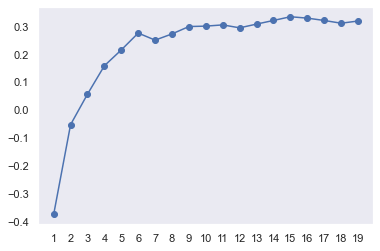

In [40]:
# display the resutls
plt.plot(range(1, 20), scores_norm)
plt.scatter(range(1, 20), scores_norm)
plt.grid()
_ =plt.xticks(range(1, 20))

    The optimal number of clusters is 15. 

In [43]:
# define and fit our model with k=12
model_norm = KNeighborsRegressor(n_neighbors=15, n_jobs=-1)
model_norm.fit(X_tr_norm, y_train)

# gather the predictations that our model made for our test set
preds_norm = model_norm.predict(X_te_norm)

# display the actuals and predictions for the test set
print('Actuals for test data set')
print(y_test)
print('Predictions for test data set')
print(preds_norm)

Actuals for test data set
[0 0 0 1 3 0 0 1 1 4 3 1 0 3 0 4 0 4 0 0 0 1 2 0 0 0 0 3 0 2 0 2 0 3 0 0 2
 3 0 1 4 4 1 0 0 0 0 3 0 0 3 1 0 1 2 0 3]
Predictions for test data set
[1.13333333 0.         0.2        0.13333333 0.06666667 0.2
 0.13333333 1.86666667 1.26666667 1.6        1.73333333 1.2
 1.73333333 1.66666667 0.2        1.6        0.13333333 1.93333333
 1.2        0.13333333 0.33333333 1.8        1.66666667 0.06666667
 0.13333333 0.         0.13333333 1.73333333 0.26666667 2.
 0.4        2.06666667 1.6        1.53333333 0.         0.2
 1.66666667 2.2        0.         0.2        1.46666667 0.93333333
 0.2        0.06666667 0.13333333 0.         0.2        1.73333333
 1.73333333 0.         0.13333333 1.73333333 0.         0.86666667
 1.66666667 0.         1.8       ]


In [44]:
differs_norm = y_test - preds_norm

print(f'Differences between the two sets:\n{differs_norm}')

print(f'r2_score: {r2_score(y_test,preds_norm)}')

Differences between the two sets:
[-1.13333333  0.         -0.2         0.86666667  2.93333333 -0.2
 -0.13333333 -0.86666667 -0.26666667  2.4         1.26666667 -0.2
 -1.73333333  1.33333333 -0.2         2.4        -0.13333333  2.06666667
 -1.2        -0.13333333 -0.33333333 -0.8         0.33333333 -0.06666667
 -0.13333333  0.         -0.13333333  1.26666667 -0.26666667  0.
 -0.4        -0.06666667 -1.6         1.46666667  0.         -0.2
  0.33333333  0.8         0.          0.8         2.53333333  3.06666667
  0.8        -0.06666667 -0.13333333  0.         -0.2         1.26666667
 -1.73333333  0.          2.86666667 -0.73333333  0.          0.13333333
  0.33333333  0.          1.2       ]
r2_score: 0.33407064154052113


    The model accuracy rose from 11% to 33% after normalizing the data. It is better, but still the model is not performing well. To improve the model we need to change the features.

### the Project

In [36]:
## project

bank = pd.read_csv('bank-full.csv',sep=";")


In [37]:
bank.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [38]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [39]:
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


    The data doesn't have missing values, but many columns are categorical, so we need to convert them to numerical data.

In [40]:
bank['job'] = bank['job'].replace({'admin.':0,'blue-collar':1,'entrepreneur':2,'housemaid':3,'management':4,'retired':5,'self-employed':6,'services':7,'student':8,'technician':9,'unemployed':10,'unknown':11})
bank['marital'] = bank['marital'].replace({'divorced':0,'married':1,'single':2,'unknown':3})
bank['default'] = bank['default'].replace({'no': 0, 'yes': 1})
bank['education'] = bank['education'].replace({"unknown":0,"secondary":1,"primary":2,"tertiary":3})
bank['housing'] = bank['housing'].replace({'yes':0,'no':1})
bank['loan'] = bank['loan'].replace({'yes':0,'no':1})
bank['contact'] = bank['contact'].replace({"unknown":0,"telephone":1,"cellular":2})
bank['month'] = bank['month'].replace({'jan':1,'feb':2,'mar':3,'apr':4,'may':5,'jun':6,'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12})
bank['poutcome'] = bank['poutcome'].replace({"unknown":0,"other":1,"failure":2,"success":3})
bank['y'] = bank['y'].replace({'no':0,'yes':1})

In [41]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        45211 non-null  int64
 1   job        45211 non-null  int64
 2   marital    45211 non-null  int64
 3   education  45211 non-null  int64
 4   default    45211 non-null  int64
 5   balance    45211 non-null  int64
 6   housing    45211 non-null  int64
 7   loan       45211 non-null  int64
 8   contact    45211 non-null  int64
 9   day        45211 non-null  int64
 10  month      45211 non-null  int64
 11  duration   45211 non-null  int64
 12  campaign   45211 non-null  int64
 13  pdays      45211 non-null  int64
 14  previous   45211 non-null  int64
 15  poutcome   45211 non-null  int64
 16  y          45211 non-null  int64
dtypes: int64(17)
memory usage: 5.9 MB


In [42]:
bank.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,3,0,2143,0,1,0,5,5,261,1,-1,0,0,0
1,44,9,2,1,0,29,0,1,0,5,5,151,1,-1,0,0,0
2,33,2,1,1,0,2,0,0,0,5,5,76,1,-1,0,0,0
3,47,1,1,0,0,1506,0,1,0,5,5,92,1,-1,0,0,0
4,33,11,2,0,0,1,1,1,0,5,5,198,1,-1,0,0,0
5,35,4,1,3,0,231,0,1,0,5,5,139,1,-1,0,0,0
6,28,4,2,3,0,447,0,0,0,5,5,217,1,-1,0,0,0
7,42,2,0,3,1,2,0,1,0,5,5,380,1,-1,0,0,0
8,58,5,1,2,0,121,0,1,0,5,5,50,1,-1,0,0,0
9,43,9,2,1,0,593,0,1,0,5,5,55,1,-1,0,0,0


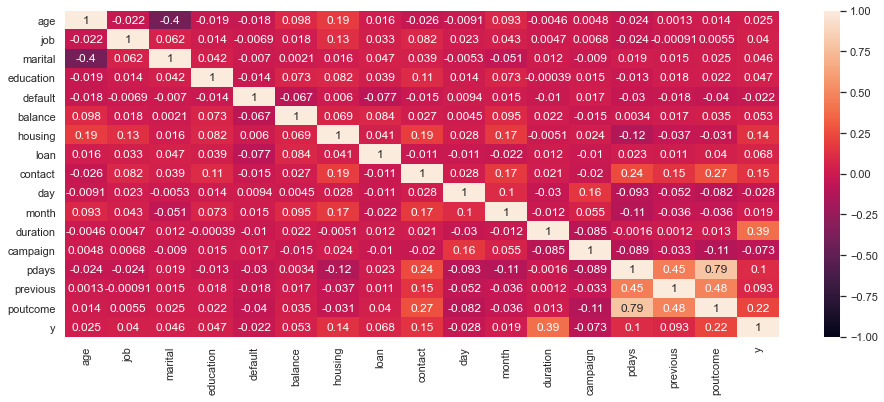

In [43]:
plt.figure(figsize=(16, 6))
_ = sns.heatmap(bank.corr(), vmin=-1, vmax=1, annot=True)

    The least correlated features are age, job, matital status, education, month, and day. so we going to drop them.

In [44]:
# trimming our data set
bank.drop(['age','job','marital','education','month','day' ],axis=1, inplace=True)

    Here we define the target 'y' which contains whether client subscribed a term deposit or not.

In [45]:
cols = bank.columns
target_col = 'y'
feat_cols = [c for c in cols if c != target_col]

# there is nothing magical about the X and y notation here. 
# however, it seems to be a fairly standard notation, so we will use is here
X = bank[feat_cols].values
y = bank[target_col].values

    We split the data to train and test sets with ratio of 80% 20%

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    We fit the train set to a KNN classifier model with 2 cluster.

In [47]:
# define and fit our model
model = KNeighborsClassifier(n_neighbors=2, n_jobs=-1)
model.fit(X_train, y_train)

KNeighborsClassifier(n_jobs=-1, n_neighbors=2)

In [48]:
# gather the predictations that our model made for our test set
preds = model.predict(X_test)

# display the actuals and predictions for the test set
print('Actuals for test data set')
print(y_test)
print('Predictions for test data set')
print(preds)

Actuals for test data set
[0 0 0 ... 0 0 0]
Predictions for test data set
[0 0 0 ... 0 0 0]


In [49]:
#compare the two sets for 'subscribed'
differs = y_test - preds
print('Differences between the two sets')
print(differs)

Differences between the two sets
[0 0 0 ... 0 0 0]


In [50]:
# R^2 (coefficient of determination) regression score function.
# Best possible score is 1.0 and it can be negative 
# (because the model can be arbitrarily worse). 
# A constant model that always predicts the expected value of y, 
# disregarding the input features, would get a R^2 score of 0.0.
from sklearn.metrics import r2_score

print(r2_score(y_test,preds))

-0.17576494715312996


In [51]:
# Explained variance regression score function
# Best possible score is 1.0, lower values are worse.

from sklearn.metrics import explained_variance_score

print(explained_variance_score(y_test,preds))

-0.12024899165847525


    The accuracy is -17%. the model is not performing well.

In [52]:
scores = []
print(f'Features: {feat_cols} \nTarget: {target_col}')

# remember the ending number for range is not inclusive
for k in range(2, 20):
    # output to let us know where we are
    print(f'Evaluating {k} clusters')
    
    # n_jobs=-1 will use all processors on your system
    model = KNeighborsRegressor(n_neighbors=k, n_jobs=-1)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))

Features: ['default', 'balance', 'housing', 'loan', 'contact', 'duration', 'campaign', 'pdays', 'previous', 'poutcome'] 
Target: y
Evaluating 2 clusters
Evaluating 3 clusters
Evaluating 4 clusters
Evaluating 5 clusters
Evaluating 6 clusters
Evaluating 7 clusters
Evaluating 8 clusters
Evaluating 9 clusters
Evaluating 10 clusters
Evaluating 11 clusters
Evaluating 12 clusters
Evaluating 13 clusters
Evaluating 14 clusters
Evaluating 15 clusters
Evaluating 16 clusters
Evaluating 17 clusters
Evaluating 18 clusters
Evaluating 19 clusters


In [53]:
scores

[-0.12755649963022897,
 -0.022771892071443034,
 0.04026101499003165,
 0.08523819359788398,
 0.10540756569665444,
 0.12406872867049445,
 0.13856716000632552,
 0.14989702988045117,
 0.15714956212988263,
 0.16007682816566693,
 0.16654398428200312,
 0.17177995090769793,
 0.17683477569997308,
 0.1787295742066205,
 0.1846746312689379,
 0.19018824985153637,
 0.18923267805279098,
 0.19315293150546287]

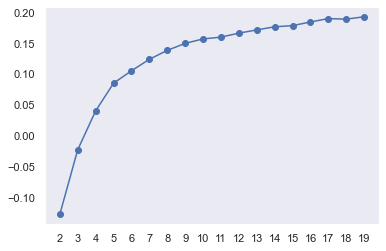

In [54]:
# display the resutls
plt.plot(range(2, 20), scores)
plt.scatter(range(2, 20), scores)
plt.grid()
_ =plt.xticks(range(2, 20))

    17 clusters and 19 clusters are the highest performing model. We are going to pick 17 clusters because it is the smallest highest K number

In [55]:
# define and fit our model
model = KNeighborsRegressor(n_neighbors=17, n_jobs=-1)
model.fit(X_train, y_train)

# gather the predictations that our model made for our test set
preds = model.predict(X_test)

# display the actuals and predictions for the test set
print('Actuals for test data set')
print(y_test)
print('Predictions for test data set')
print(preds)

Actuals for test data set
[0 0 0 ... 0 0 0]
Predictions for test data set
[0.         0.05882353 0.05882353 ... 0.05882353 0.05882353 0.        ]


In [56]:
differs = y_test - preds

print(f'Differences between the two sets:\n{differs}')

print(f'r2_score: {r2_score(y_test,preds)}')

Differences between the two sets:
[ 0.         -0.05882353 -0.05882353 ... -0.05882353 -0.05882353
  0.        ]
r2_score: 0.19018824985153637


    The model accuracy is 19% which is better than the first model but still not performing well.

In [57]:
#visualiztion 

pc = PCA()
tr_pca = pc.fit_transform(X_train)
te_pca = pc.transform(X_test)

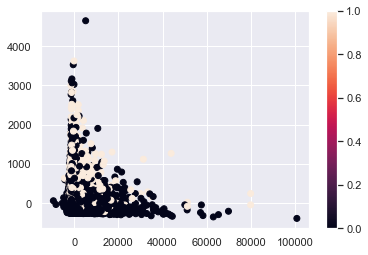

In [58]:
# indexing of a matrix in Python (numpy) is [rows, cols]
_ = plt.scatter(tr_pca[:, 0], tr_pca[:, 1], c=y_train)
_ = plt.colorbar()

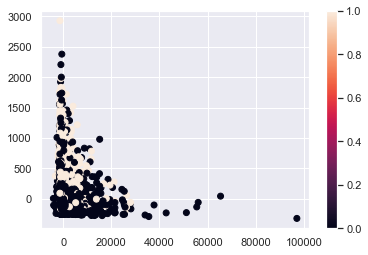

In [59]:
_ = plt.scatter(te_pca[:, 0], te_pca[:, 1], c=y_test)
_ = plt.colorbar()

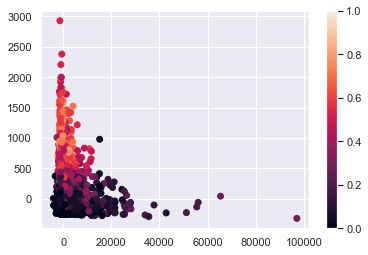

In [60]:
_ = plt.scatter(te_pca[:, 0], te_pca[:, 1], c=preds)
_ = plt.colorbar()

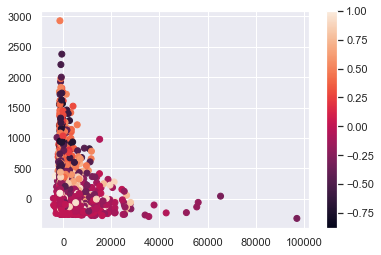

In [61]:
_ = plt.scatter(te_pca[:, 0], te_pca[:, 1], c=differs)
_ = plt.colorbar()

    Clearly we need to improve the model's preformance. To do that, we need to normalize data.

In [62]:
# we only want to normalize our feature columns in the dataset and I don't want to resplit the dataset.
# So, I will normalize the X_train and X_test only
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()

X_tr_norm = min_max_scaler.fit_transform(X_train)
X_te_norm = min_max_scaler.fit_transform(X_test)

In [63]:
new_bank_tr = pd.DataFrame(X_tr_norm,columns=feat_cols)
new_bank_tr['y'] = y_train
new_bank_tr.head(10)

,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,y
0,0.0,0.080511,0.0,1.0,0.0,0.014640,0.000000,0.000000,0.000000,0.0,0
1,0.0,0.085650,0.0,1.0,1.0,0.054697,0.016129,0.000000,0.000000,0.0,0
2,0.0,0.107684,1.0,1.0,1.0,0.026434,0.048387,0.000000,0.000000,0.0,0
3,0.0,0.071723,0.0,1.0,0.0,0.076251,0.161290,0.000000,0.000000,0.0,0
4,0.0,0.104561,1.0,1.0,1.0,0.053680,0.016129,0.000000,0.000000,0.0,1
5,0.0,0.107911,1.0,1.0,1.0,0.052257,0.177419,0.000000,0.000000,0.0,0
6,0.0,0.080511,0.0,1.0,0.0,0.053070,0.080645,0.000000,0.000000,0.0,0
7,0.0,0.076417,0.0,0.0,0.0,0.043514,0.016129,0.000000,0.000000,0.0,0
8,0.0,0.077788,1.0,1.0,0.0,0.030297,0.000000,0.000000,0.000000,0.0,0
9,0.0,0.084787,1.0,1.0,1.0,0.069134,0.000000,0.105505,0.007273,1.0,1


In [64]:
new_auto_te = pd.DataFrame(X_te_norm,columns=feat_cols)
new_auto_te['y'] = y_test
new_auto_te.head(10)

,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,y
0,0.0,0.032552,0.0,1.0,0.0,0.060320,0.000000,0.000000,0.000000,0.000000,0
1,0.0,0.062850,1.0,1.0,0.0,0.026076,0.018519,0.000000,0.000000,0.000000,0
2,0.0,0.032137,0.0,1.0,1.0,0.071002,0.000000,0.000000,0.000000,0.000000,0
3,0.0,0.044349,1.0,1.0,1.0,0.097707,0.000000,0.399763,0.017241,0.666667,0
4,0.0,0.028963,1.0,0.0,1.0,0.038014,0.018519,0.000000,0.000000,0.000000,0
5,0.0,0.038031,1.0,1.0,1.0,0.040842,0.037037,0.000000,0.000000,0.000000,0
6,0.0,0.037546,1.0,0.0,1.0,0.029846,0.092593,0.000000,0.000000,0.000000,0
7,0.0,0.028073,1.0,1.0,1.0,0.026076,0.055556,0.000000,0.000000,0.000000,0
8,0.0,0.026847,0.0,1.0,1.0,0.016023,0.000000,0.000000,0.000000,0.000000,0
9,0.0,0.029368,1.0,0.0,0.0,0.184417,0.018519,0.000000,0.000000,0.000000,0


In [65]:
scores_norm = []
print(f'Features: {feat_cols} \nTarget: {target_col}')

# remember the ending number for range is not inclusive
for k in range(2, 30):
    # output to let us know where we are
    print(f'Evaluating {k} clusters')
    
    # n_jobs=-1 will use all processors on your system
    model_norm = KNeighborsRegressor(n_neighbors=k, n_jobs=-1)
    model_norm.fit(X_tr_norm, y_train)
    scores_norm.append(model_norm.score(X_te_norm, y_test))

Features: ['default', 'balance', 'housing', 'loan', 'contact', 'duration', 'campaign', 'pdays', 'previous', 'poutcome'] 
Target: y
Evaluating 2 clusters
Evaluating 3 clusters
Evaluating 4 clusters
Evaluating 5 clusters
Evaluating 6 clusters
Evaluating 7 clusters
Evaluating 8 clusters
Evaluating 9 clusters
Evaluating 10 clusters
Evaluating 11 clusters
Evaluating 12 clusters
Evaluating 13 clusters
Evaluating 14 clusters
Evaluating 15 clusters
Evaluating 16 clusters
Evaluating 17 clusters
Evaluating 18 clusters
Evaluating 19 clusters
Evaluating 20 clusters
Evaluating 21 clusters
Evaluating 22 clusters
Evaluating 23 clusters
Evaluating 24 clusters
Evaluating 25 clusters
Evaluating 26 clusters
Evaluating 27 clusters
Evaluating 28 clusters
Evaluating 29 clusters


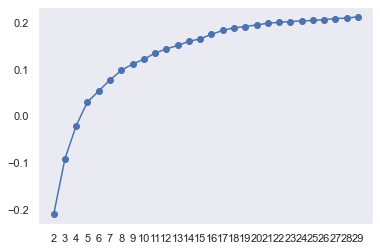

In [66]:
# display the resutls
plt.plot(range(2, 30), scores_norm)
plt.scatter(range(2, 30), scores_norm)
plt.grid()
_ =plt.xticks(range(2, 30))

    Seems like k=21 is the optimal 

In [67]:
# define and fit our model with k=21
model_norm = KNeighborsRegressor(n_neighbors=21, n_jobs=-1)
model_norm.fit(X_tr_norm, y_train)

# gather the predictations that our model made for our test set
preds_norm = model_norm.predict(X_te_norm)

# display the actuals and predictions for the test set
print('Actuals for test data set')
print(y_test)
print('Predictions for test data set')
print(preds_norm)

Actuals for test data set
[0 0 0 ... 0 0 0]
Predictions for test data set
[0.        0.        0.0952381 ... 0.        0.        0.       ]


In [68]:
differs_norm = y_test - preds_norm

print(f'Differences between the two sets:\n{differs_norm}')

print(f'r2_score: {r2_score(y_test,preds_norm)}')

Differences between the two sets:
[ 0.         0.        -0.0952381 ...  0.         0.         0.       ]
r2_score: 0.19855738338320994


    The model performance is slightly improved by 0.008 which it doesn't worth to normalize the data. 

## Conclusion 

    In sum, both exercise and project models are performing far below the acceptable model. This performance is because many features are not strongly correlated with the target. In order to improve our models, we need to go back and do better with feature selection. 

## References

    Harrison, O. (2018, Sep 10). Machine Learning Basics with the K-Nearest Neighbors Algorithm. Retrieved from Toward data science: https://towardsdatascience.com/machine-learning-basics-with-the-k-nearest-neighbors-algorithm-6a6e71d01761
    Wijaya, C. Y. (2020, Jul 12). Jupyter Notebook to PDF in a few lines. Retrieved from Toward data science: https://towardsdatascience.com/jupyter-notebook-to-pdf-in-a-few-lines-3c48d68a7a63

